In [2417]:
# Crime type data analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from categories import *

# Creating data frame from processed and cleaned csv file
crime_df = pd.read_csv('curated_crime.csv')


In [2418]:

neighborhood_counts = crime_df['Neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Crime Count']



In [2419]:
crime_df.head(3)

,index,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Latitude,Longitude,Year,Month,Time Rounded,Exact Time,Date,Date of Report\t,Year Reported,Day of Week,Holiday
0,0,2009-01323,2009-02-21 09:53:00,2009-02-21 09:20:00,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA",42.370427,-71.082645,2009,2,09:00,09:20:00,2009-02-21,2009-02-21 09:53:00,2009,Saturday,Average Nonholiday
1,1,2009-01324,2009-02-21 09:59:00,2009-02-20 22:30:00,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA",42.393764,-71.139481,2009,2,22:00,22:30:00,2009-02-20,2009-02-21 09:59:00,2009,Friday,Average Nonholiday
2,2,2009-01327,2009-02-21 12:32:00,2009-02-19 21:00:00,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA",42.393764,-71.139481,2009,2,21:00,21:00:00,2009-02-19,2009-02-21 12:32:00,2009,Thursday,Average Nonholiday


 How many incidents were reported for each type of crime?

How many incidents were reported in each neighborhood?

How many incidents were reported in each reporting area?

How many incidents were reported each year?

 How many incidents were reported each month?

what is the distribution of crime incidents by time of day?

How many incidents were reported on holidays compared to non-holidays?

What are the top 10 locations (addresses) with the highest number of crime incidents?

What is the distribution of crime incidents by day of the week?

What is the correlation between different types of crimes and the time of day they occur? --> -->

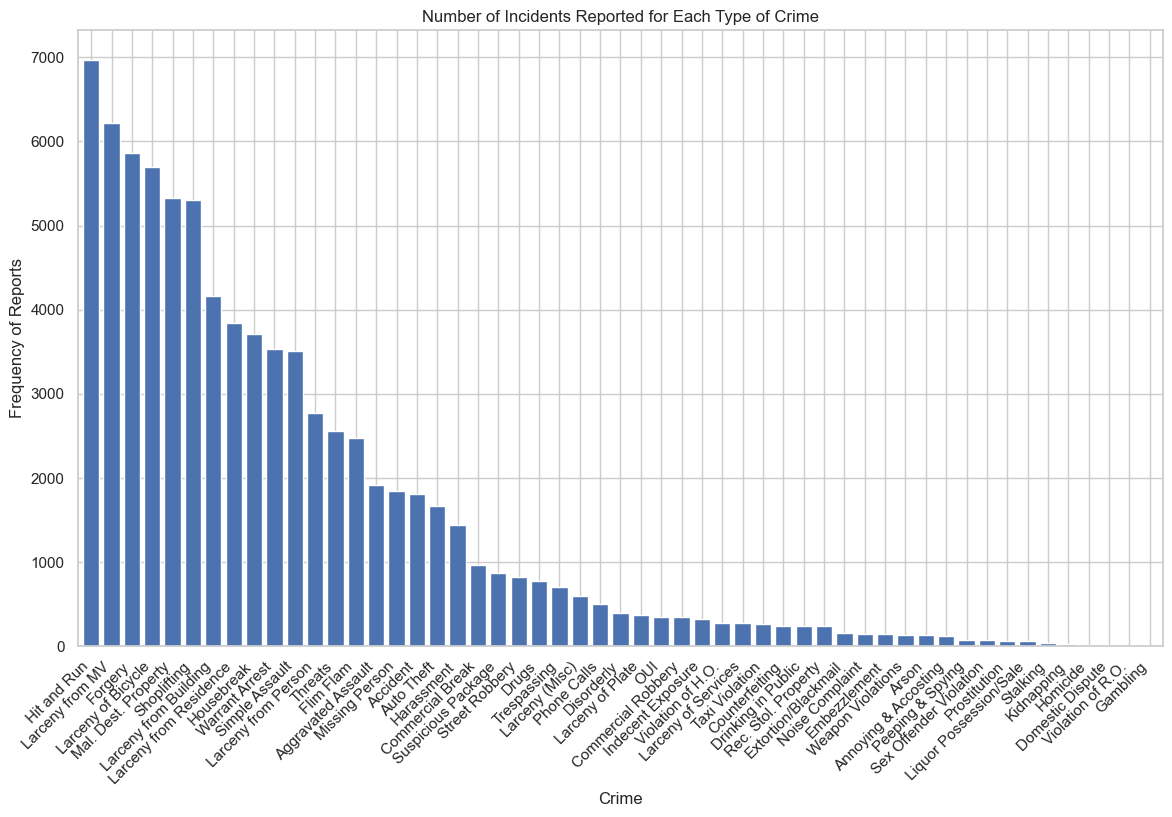

In [2420]:
# How many incidents were reported for each type of crime?

crime_counts = crime_df['Crime'].value_counts()
fig, ax = plt.subplots(figsize=(14, 8))
crime_counts_plot = crime_counts.plot.bar(ax=ax, width=0.8)

crime_counts_plot.set_ylabel("Frequency of Reports")
crime_counts_plot.set_title("Number of Incidents Reported for Each Type of Crime")

plt.xticks(rotation=45, ha='right')

plt.show()


In [2421]:
crime_counts.head(5)

Crime
Hit and Run            6972
Larceny from MV        6213
Forgery                5859
Larceny of Bicycle     5699
Mal. Dest. Property    5331
Name: count, dtype: int64

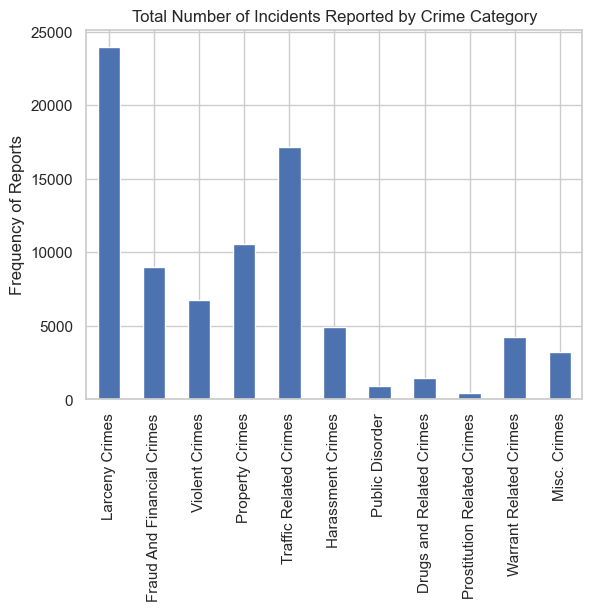

In [2422]:
category_counts = {}

# Iterate through each category and sum the number of incidents for each crime type in that category
for category, crimes in CATEGORIES.items():
    category_count = crime_df[crime_df['Crime'].isin(crimes)]['Crime'].count()
    category_counts[category] = category_count

# Convert the dictionary to a Series for easier plotting
category_counts_series = pd.Series(category_counts)

# Plot the counts
category_counts_plot = category_counts_series.plot.bar()

# Adding y-label and title
category_counts_plot.set_ylabel("Frequency of Reports")
category_counts_plot.set_title("Total Number of Incidents Reported by Crime Category")

# Display the plot
plt.show()

In [2423]:
# Toggle to run this cell, it takes up a lot of space
flag = False
if flag is True:
    for category, crime_types in CATEGORIES.items():
        # Filter the DataFrame to include only crimes from the current category
        category_df = crime_df[crime_df['Crime'].isin(crime_types)]
        
        # Count the occurrences of each crime type within the category
        crime_counts = category_df['Crime'].value_counts()
        
        # Plot the counts
        crime_counts_plot = crime_counts.plot.bar()
        
        # Adding y-label and title
        crime_counts_plot.set_ylabel("Frequency of Reports")
        crime_counts_plot.set_title(f"Number of Incidents Reported for {category}")
        
        # Display the plot
        plt.show()

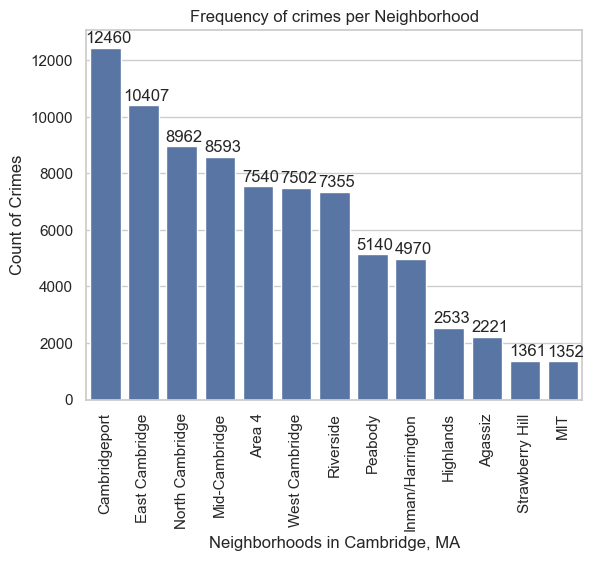

In [2424]:
# Bar graph
plt.title('Frequency of crimes per Neighborhood')
plt.xlabel('Neighborhoods in Cambridge, MA')
plt.ylabel('Count of Crimes')
n = sns.barplot(neighborhood_counts, x='Neighborhood', y = 'Crime Count')
plt.xticks(rotation='vertical')

for p in n.patches:
    n.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (2, 7), 
                      textcoords = 'offset points')

#orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')


In [2425]:
# How many incidents were reported in each reporting area?

report_area_counts = crime_df['Reporting Area'].value_counts().reset_index()
report_area_counts.columns = ['Reporting Area', 'Crime Count']

report_area_counts.size


234

/var/folders/2t/3vh0t1gx4ssfv6fklcvfr6bm0000gn/T/ipykernel_83045/1512138589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reporting Area', y='Crime Count', data=report_area_counts, palette='viridis')


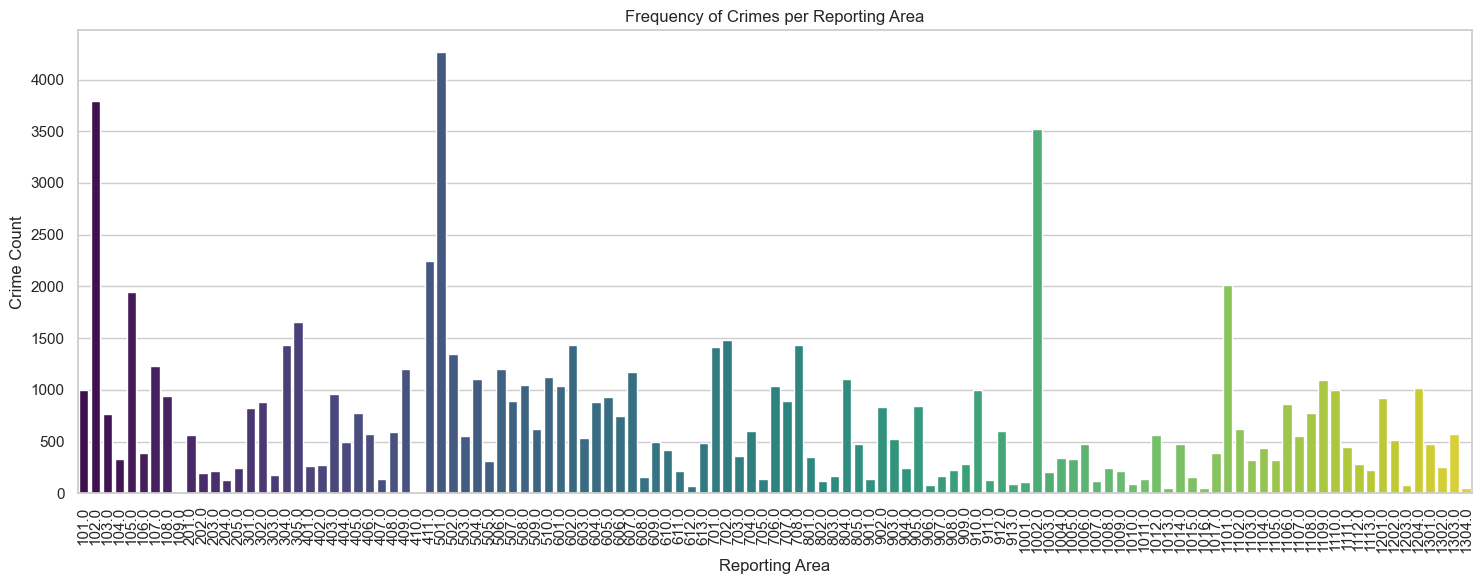

In [2426]:
# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(15, 6))  # Set the size of the figure
plt.title('Frequency of Crimes per Reporting Area')
plt.xlabel('Reporting Area')
plt.ylabel('Crime Count')

# Plotting the data
sns.barplot(x='Reporting Area', y='Crime Count', data=report_area_counts, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

In [2427]:
#How many incidents were reported each year?
year_counts = crime_df['Year'].value_counts().reset_index()
year_counts.columns = ['Year','Crime Count']


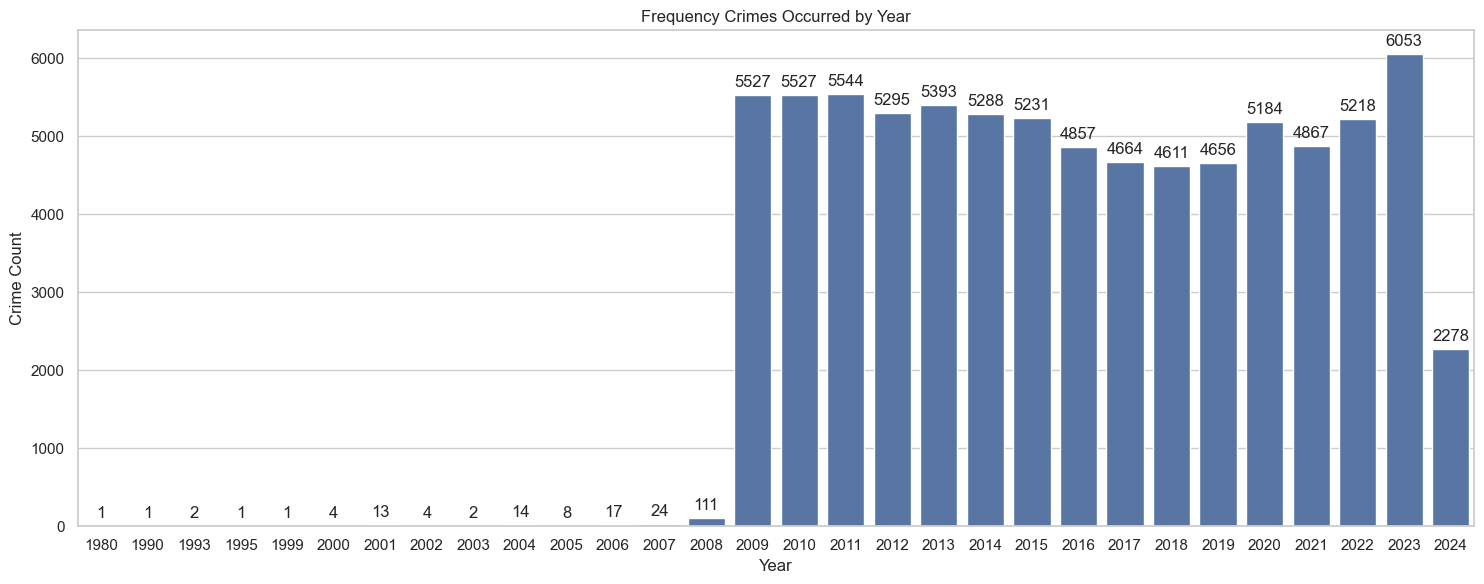

In [2428]:
# Years crimes were comitted
plt.figure(figsize=(15,6))
plt.title('Frequency Crimes Occurred by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')

year_plot = sns.barplot(x='Year', y='Crime Count', data=year_counts)

for p in year_plot.patches:
    year_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

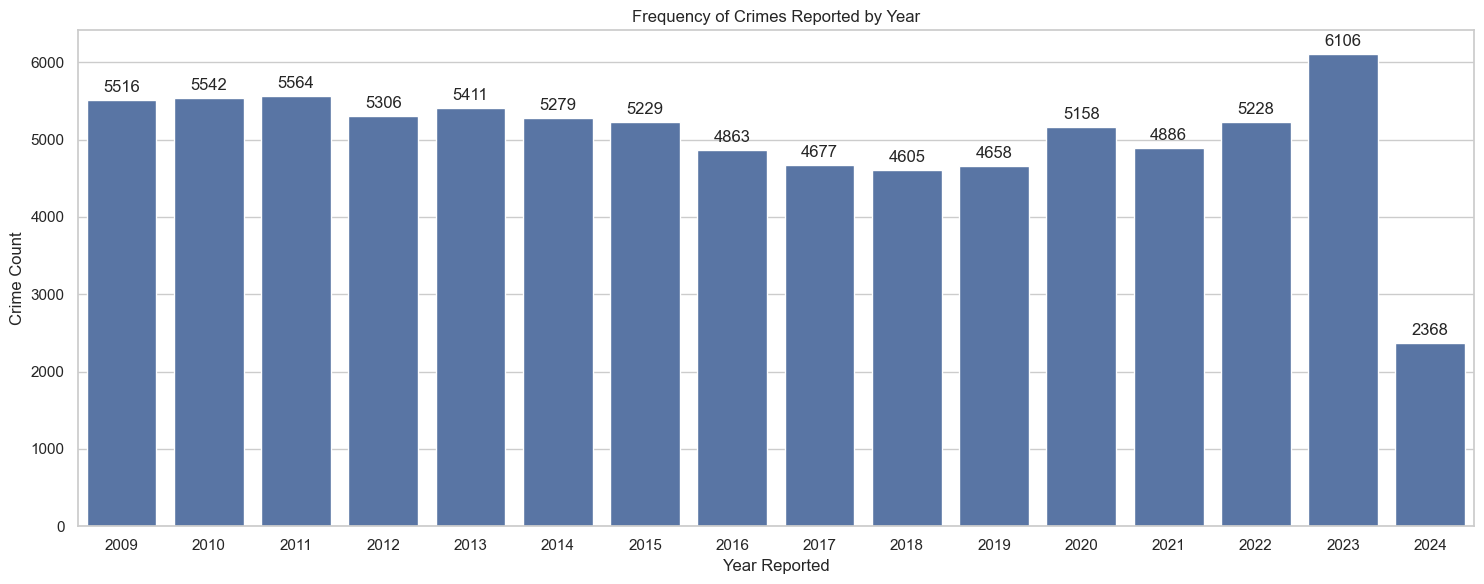

In [2429]:
# Years crimes were reporyted

year_counts = crime_df['Year Reported'].value_counts().reset_index()
year_counts.columns = ['Year Reported','Crime Count']

plt.figure(figsize=(15,6))
plt.title('Frequency of Crimes Reported by Year')
plt.xlabel('Year Reported')
plt.ylabel('Crime Count')

year_plot = sns.barplot(x='Year Reported', y='Crime Count', data=year_counts)

for p in year_plot.patches:
    year_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

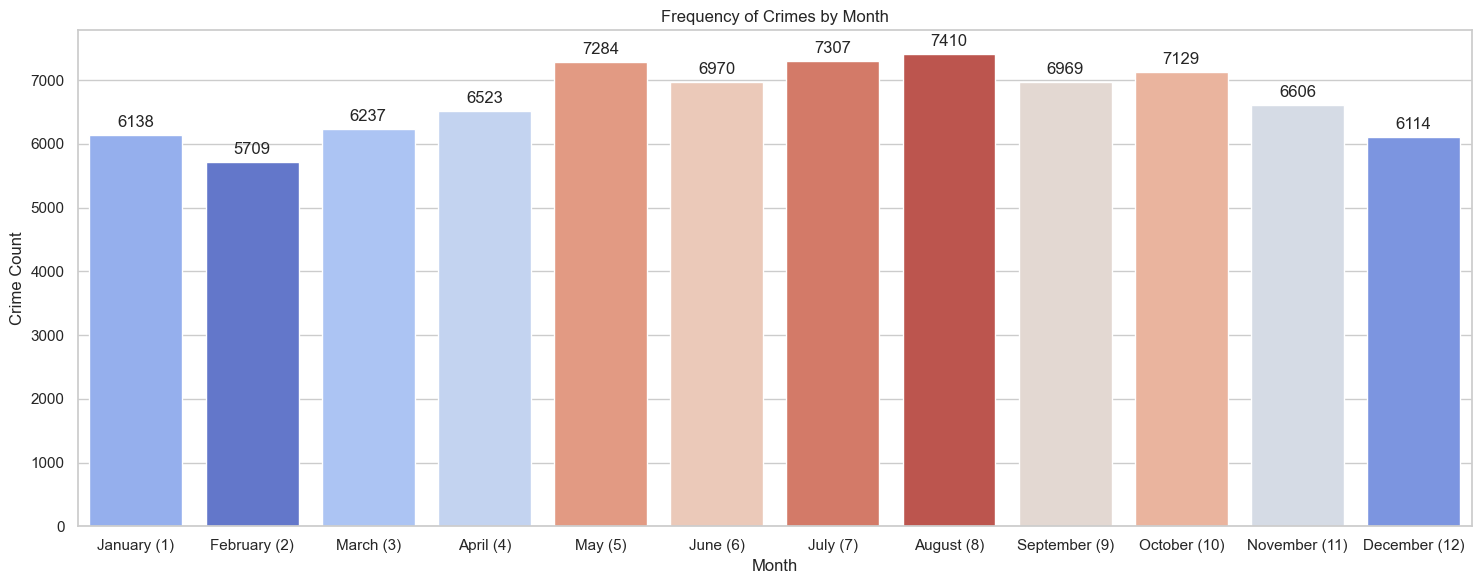

In [2430]:
#  How many incidents were reported each month?
year_counts = crime_df['Month'].value_counts().reset_index()
year_counts.columns = ['Month','Crime Count']

month_mapping = {
    1: "January (1)", 2: "February (2)", 3: "March (3)", 4: "April (4)",
    5: "May (5)", 6: "June (6)", 7: "July (7)", 8: "August (8)",
    9: "September (9)", 10: "October (10)", 11: "November (11)", 12: "December (12)"
}
month_order = [
    "January (1)", "February (2)", "March (3)", "April (4)",
    "May (5)", "June (6)", "July (7)", "August (8)",
    "September (9)", "October (10)", "November (11)", "December (12)"
]

# Apply mapping to the 'Month' column
year_counts['Month'] = year_counts['Month'].map(month_mapping)


plt.figure(figsize=(15,6))
plt.title('Frequency of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')

bar_plot = sns.barplot(x='Month', y='Crime Count', data=year_counts, palette='coolwarm_r', hue='Month', order=month_order)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.tight_layout() 
plt.show()

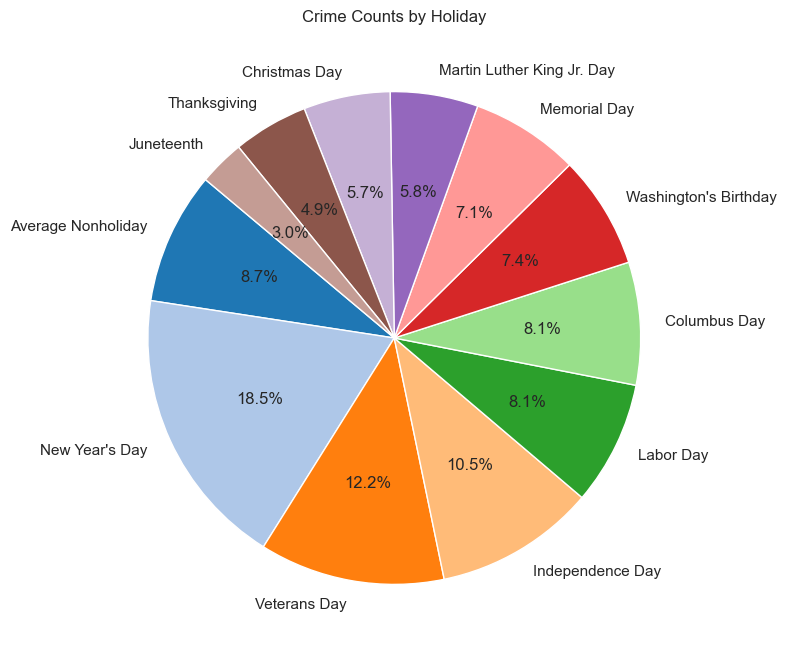

In [2431]:
# How many incidents were reported on holidays compared to non-holidays?
def update_count(value):
    return value / (365-11)

holiday_crime_counts = crime_df['Holiday'].value_counts()
holiday_crime_counts = holiday_crime_counts.reset_index()
holiday_crime_counts

holiday_crime_counts.loc[holiday_crime_counts['Holiday'] == 'Average Nonholiday', 'count'] = \
    (holiday_crime_counts.loc[holiday_crime_counts['Holiday'] == 'Average Nonholiday', 'count'] / 354).astype(int)


holiday_crime_counts

  
colors = plt.get_cmap('tab20').colors

plt.figure(figsize=(8, 8))
plt.pie(holiday_crime_counts['count'], labels=holiday_crime_counts['Holiday'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Crime Counts by Holiday')
plt.show()

In [2432]:
holiday_crime_counts


,Holiday,count
0,Average Nonholiday,220
1,New Year's Day,469
2,Veterans Day,308
3,Independence Day,267
4,Labor Day,206
5,Columbus Day,204
6,Washington's Birthday,188
7,Memorial Day,180
8,Martin Luther King Jr. Day,146
9,Christmas Day,144


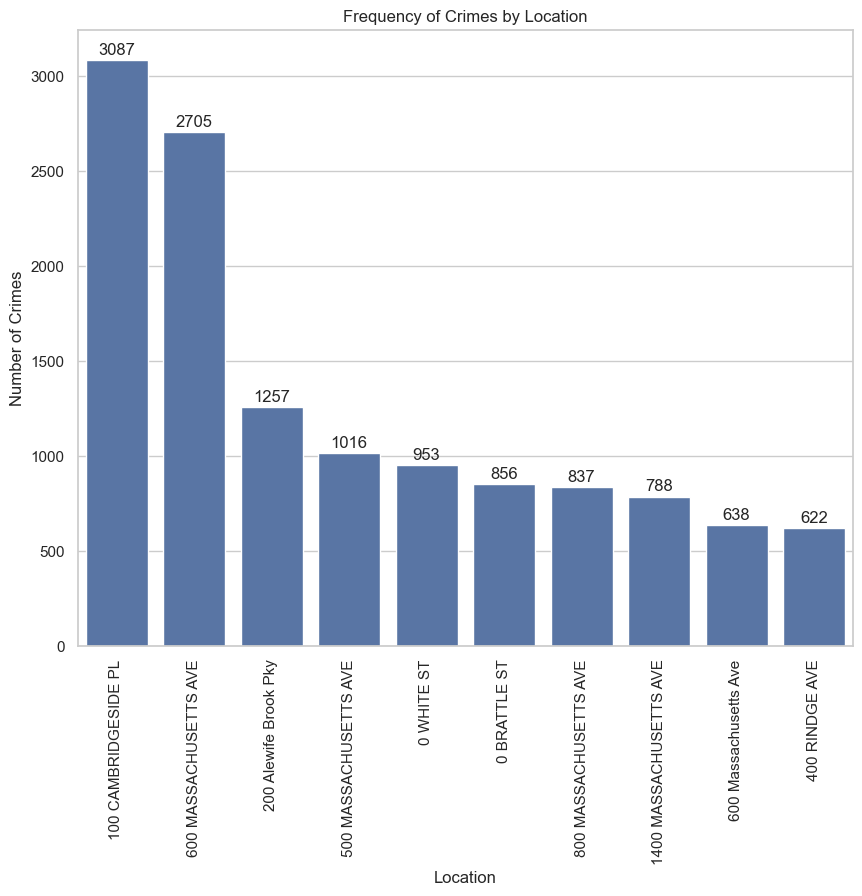

In [2433]:
# What are the top 10 locations (addresses) with the highest number of crime incidents?

# Counting counts of each crmes
loc_count = crime_df['Location'].value_counts().reset_index()
loc_count['Location'] = loc_count['Location'].str.split(',').str[0]
loc_count.columns = ['Location', 'Crime Count']

top_10_loc = loc_count.head(10).sort_values(by='Crime Count', ascending=False)

# Bar graph
plt.figure(figsize=(10,8))
plt.xticks(rotation="vertical")
plt.title('Frequency of Crimes by Location')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
loc_plot = sns.barplot(top_10_loc, x='Location', y = 'Crime Count')

for p in loc_plot.patches:
    loc_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 7), 
                      textcoords = 'offset points')

# Displaying legend


orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')


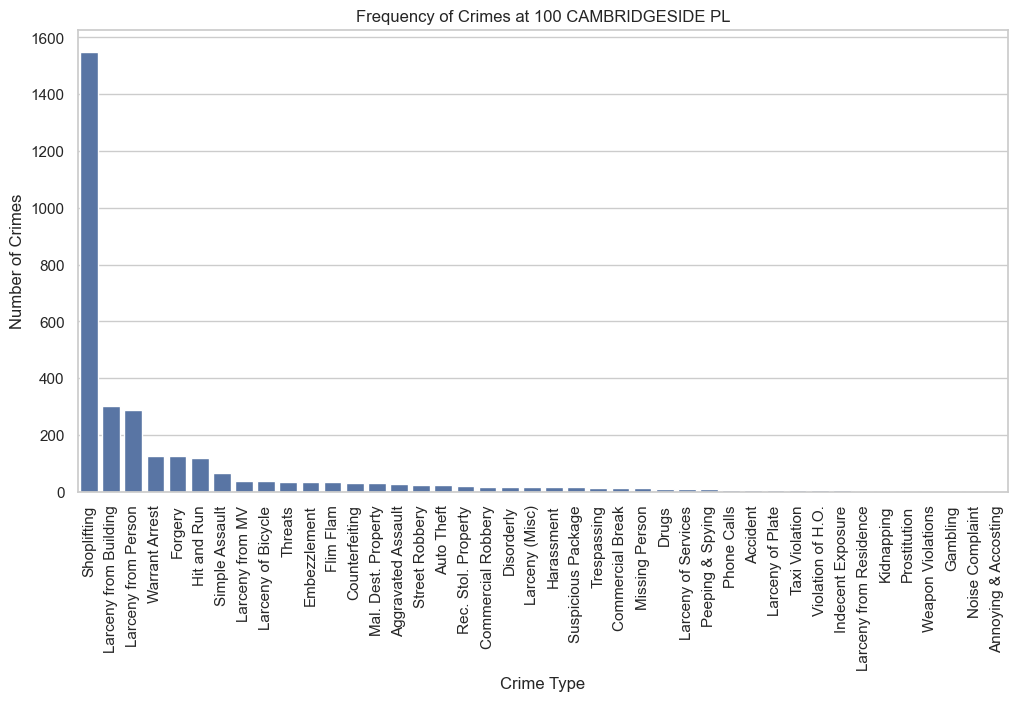

In [2434]:
# Deeper look at just Cambridgeside_PL

c = crime_df
c['Location'] = c['Location'].str.split(',').str[0]
cambridgeside_df = c[c['Location'] == "100 CAMBRIDGESIDE PL"]
cambridgeside_df

# Get the frequency of each crime type
cambridgeside_counts = cambridgeside_df['Crime'].value_counts().reset_index()
cambridgeside_counts.columns = ['Crime', 'Crime Count']

plt.figure(figsize=(12, 6))

plt.title('Frequency of Crimes at 100 CAMBRIDGESIDE PL')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
cambridgeside_plot = sns.barplot(data=cambridgeside_counts, x='Crime', y='Crime Count')

plt.xticks(rotation="vertical")


orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')

plt.show()

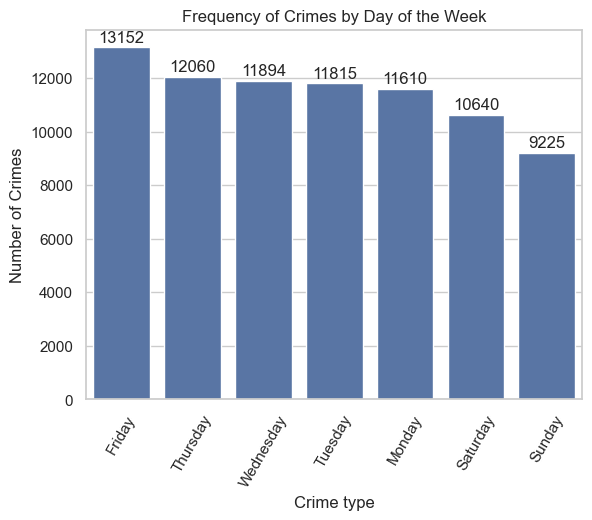

In [2435]:
# What is the distribution of crime incidents by day of the week?

# Counting counts of each crmes
weekday_count = crime_df['Day of Week'].value_counts().reset_index()
weekday_count.columns = ['Day of Week', 'Crime Count']

# top_10_loc = loc_count.head(10).sort_values(by='Crime Count', ascending=False)

# Bar graph
plt.title('Frequency of Crimes by Day of the Week')
plt.xlabel('Crime type')
plt.ylabel('Number of Crimes')
day_plot = sns.barplot(weekday_count, x='Day of Week', y = 'Crime Count')

plt.xticks(rotation=60)

# Adding values on top of bar graphs for better visibility
for p in day_plot.patches:
    day_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 7), 
                      textcoords = 'offset points')

orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')


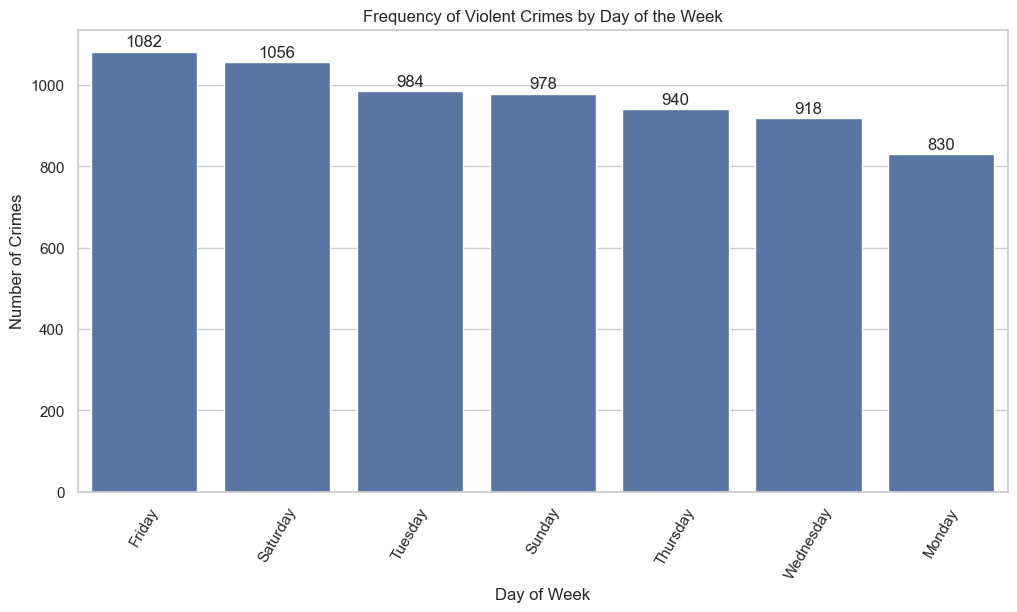

In [2436]:
violent_crimes = [
    'Aggravated Assault', 'Simple Assault', 'Homicide', 'Kidnapping', 
    'Street Robbery', 'Commercial Robbery', 'Domestic Dispute', 'Weapon Violations'
]

violent_crimes_df = crime_df[crime_df['Crime'].isin(violent_crimes)]

# Counting counts of each crime by day of the week
weekday_count = violent_crimes_df['Day of Week'].value_counts().reset_index()
weekday_count.columns = ['Day of Week', 'Crime Count']

# Bar graph
plt.figure(figsize=(12, 6))  # Set figure size
plt.title('Frequency of Violent Crimes by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
day_plot = sns.barplot(data=weekday_count, x='Day of Week', y='Crime Count')

plt.xticks(rotation=60)

for p in day_plot.patches:
    day_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 7), 
                      textcoords='offset points')

plt.show()

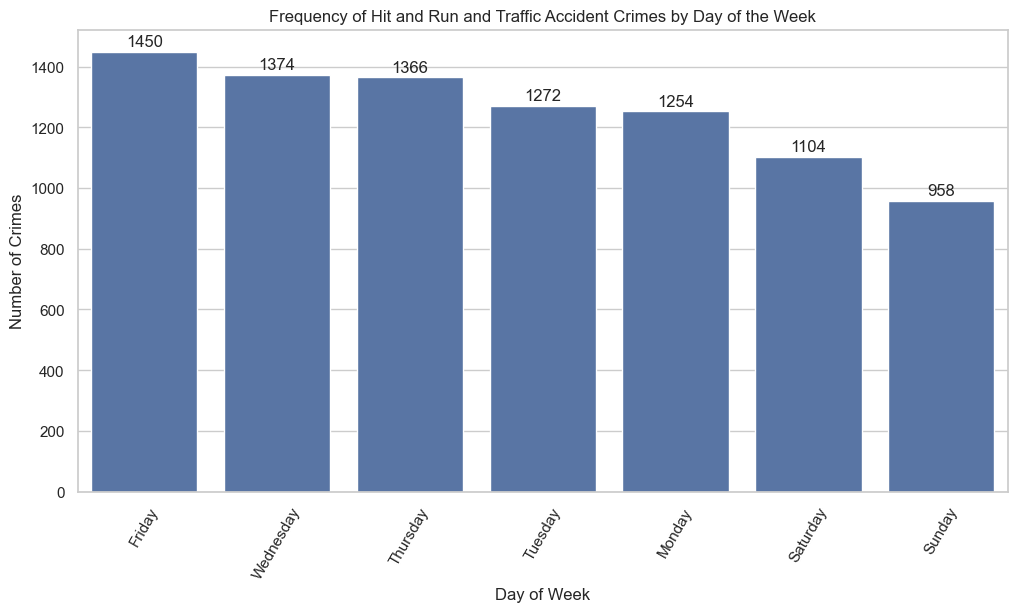

In [2451]:
commuting =  [
        'Hit and Run', 'Accident'
    ]

commuting_df = crime_df[crime_df['Crime'].isin(commuting)]

# Counting counts of each crime by day of the week
weekday_traffic_count = commuting_df['Day of Week'].value_counts().reset_index()
weekday_traffic_count.columns = ['Day of Week', 'Crime Count']

# Bar graph
plt.figure(figsize=(12, 6))  # Set figure size
plt.title('Frequency of Hit and Run and Traffic Accident Crimes by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
car_plot = sns.barplot(data=weekday_traffic_count, x='Day of Week', y='Crime Count')

plt.xticks(rotation=60)

for p in car_plot.patches:
    car_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 7), 
                      textcoords='offset points')

plt.show()

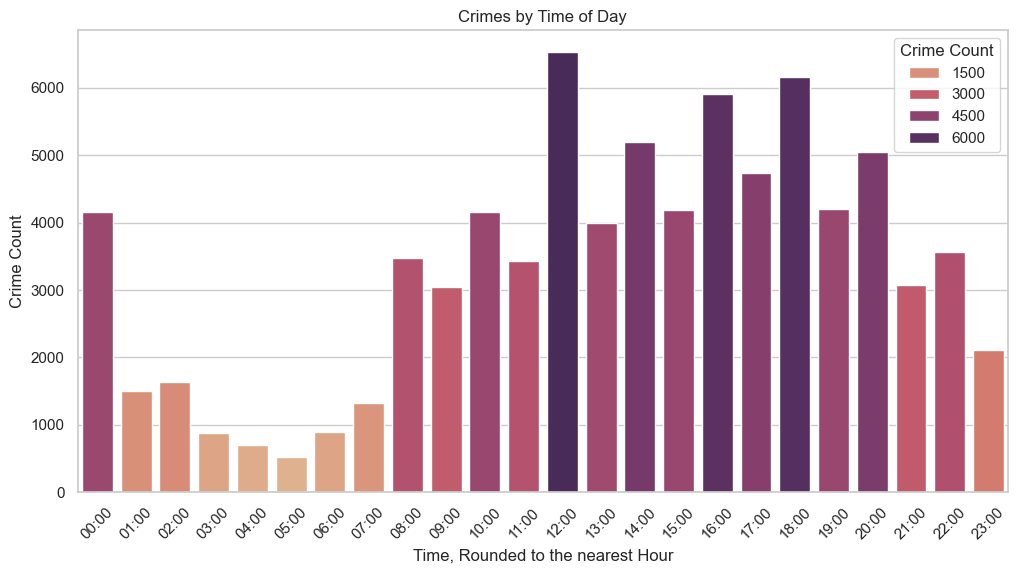

In [2453]:
#What is the correlation between different types of crimes and the time of day they occur?
time_count = crime_df['Time Rounded'].value_counts().reset_index()

time_count.columns = ['Time Rounded', 'Crime Count']
time_count = time_count.sort_values('Time Rounded')

plt.figure(figsize=(12, 6))
palette = sns.color_palette("flare", as_cmap=True)

time_plot = sns.barplot(data=time_count, x='Time Rounded', y='Crime Count', palette=palette, hue ='Crime Count')



plt.xlabel('Time, Rounded to the nearest Hour')
plt.ylabel('Crime Count')
plt.title('Crimes by Time of Day')
plt.xticks(rotation=45) 
plt.show()




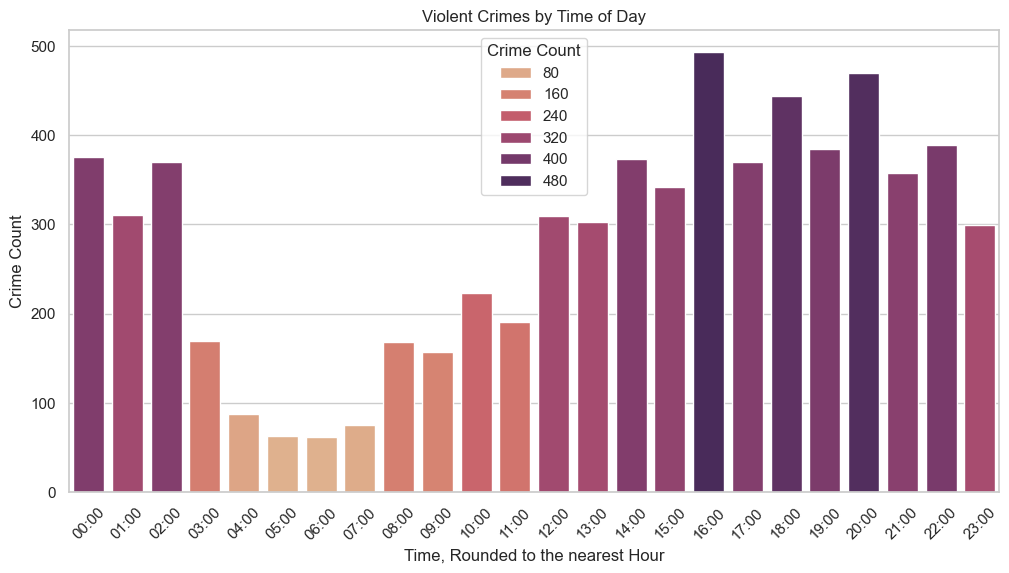

In [2454]:
violent_crimes_df = crime_df[crime_df['Crime'].isin(violent_crimes)]

# Calculate the count of crimes by rounded time
time_count = violent_crimes_df['Time Rounded'].value_counts().reset_index()
time_count.columns = ['Time Rounded', 'Crime Count']
time_count = time_count.sort_values('Time Rounded')

# Plotting
plt.figure(figsize=(12, 6))
palette = sns.color_palette("flare", as_cmap=True)

time_plot = sns.barplot(data=time_count, x='Time Rounded', y='Crime Count', palette=palette, hue='Crime Count')

plt.xlabel('Time, Rounded to the nearest Hour')
plt.ylabel('Crime Count')
plt.title('Violent Crimes by Time of Day')
plt.xticks(rotation=45)

plt.show()


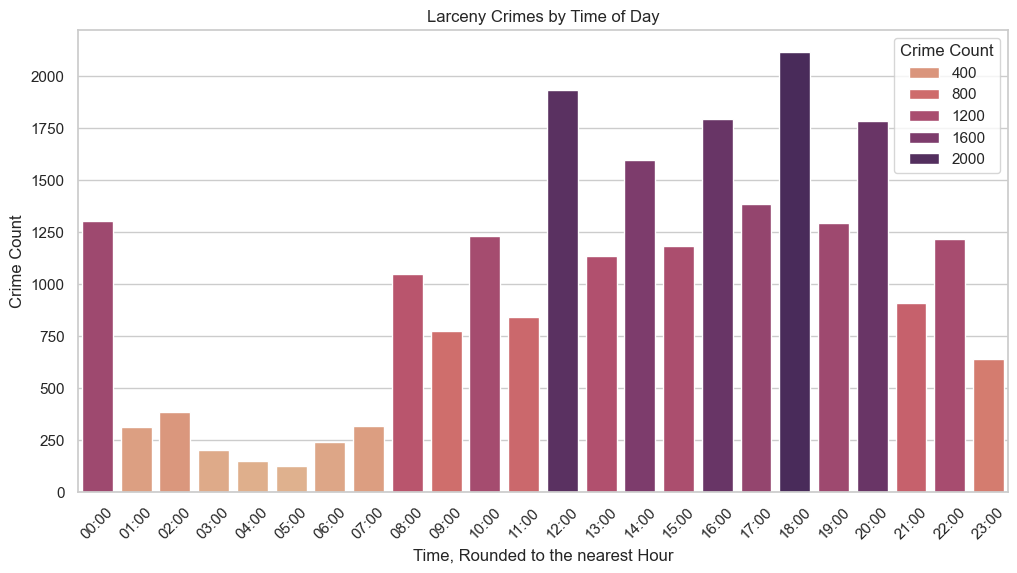

In [2455]:
larceny_crimes = [
        'Larceny (Misc)', 'Larceny from Building', 'Larceny from MV',
        'Larceny from Person', 'Larceny from Residence', 'Larceny of Bicycle',
        'Larceny of Plate', 'Larceny of Services'
    ]

larceny_crimes_df = crime_df[crime_df['Crime'].isin(larceny_crimes)]

# Calculate the count of crimes by rounded time
time_count = larceny_crimes_df['Time Rounded'].value_counts().reset_index()
time_count.columns = ['Time Rounded', 'Crime Count']
time_count = time_count.sort_values('Time Rounded')

# Plotting
plt.figure(figsize=(12, 6))
palette = sns.color_palette("flare", as_cmap=True)

time_plot = sns.barplot(data=time_count, x='Time Rounded', y='Crime Count', palette=palette, hue='Crime Count')

plt.xlabel('Time, Rounded to the nearest Hour')
plt.ylabel('Crime Count')
plt.title('Larceny Crimes by Time of Day')
plt.xticks(rotation=45)

plt.show()

In [2456]:
# group crimes by hour
grouped_crimes_by_hour = crime_df.groupby(['Time Rounded', 'Crime'])

# count size (frequencies) of each grouping
crime_counts = grouped_crimes_by_hour.size()
grouped_df = crime_counts.reset_index(name='Crime Count')
grouped_by_time = grouped_df.groupby('Time Rounded')
# find index of max count for each hour
max_count_indices = grouped_by_time['Crime Count'].idxmax()
# create dataframe of only these values
max_crime_per_hour = grouped_df.loc[max_count_indices]

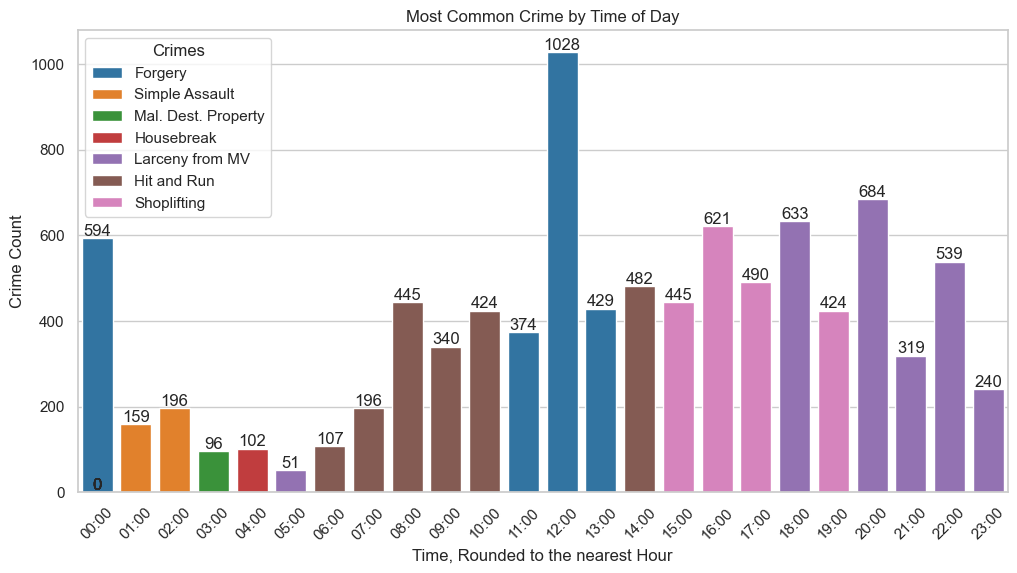

In [2457]:



plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", max_crime_per_hour['Crime'].nunique())

common_crime_plot = sns.barplot(
    data=max_crime_per_hour, 
    x='Time Rounded', 
    y='Crime Count', 
    hue='Crime',
    palette=palette
)

plt.xlabel('Time, Rounded to the nearest Hour')
plt.ylabel('Crime Count')
plt.title('Most Common Crime by Time of Day')
plt.xticks(rotation=45)

# adding counts on top of the bars
for p in common_crime_plot.patches:
    common_crime_plot.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.legend(title='Crimes')
plt.show()
